# Let's dive into the Lego world!




## Table of contents
    1. Project Overview
    2. Data and Method
    3. Descriptive Analysis
    4. Summary of main findings
  

## 1. Project Overview
### Introduction

<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>

Lego is a Danish company founded in 1932 by Ole Kirk Christiansen. Originally, the company made wooden toys, but by 1934, it had begun creating plastic toys, including the Lego bricks that would become its most famous product. Lego has grown to be one of the world's most popular toys, noted for its versatility and creativity.

### The task

<p>In this project, I've analyzed a fascinating dataset on every single Lego block that has ever been built!</p>

I've started with analyzing the popularity of various Lego sets and themes using the dataset provided for an example company which is Denmark's well-known Lego Group. 
The goal is to understand the history of Lego blocks. In doing so I've worked on answering several questions:

    1 What is the number of Lego sets released per year?
    2 What is the average number of Lego parts per year?
    3 How the number of themes shipped has varied over the years?
    4 What are the 5 most popular colors used in Lego parts?
    5 What is the distribution of transparent vs. non-transparent colors?
    6 How many unique color lego bricks are available?
    7 What are the top 10 Lego themes?
    8 Creating visualizations for the above findings.



## 2. Data and Methods
The data consists of eight csv files having information regarding the inventories, parts, part color, sets and themes, spanning the entire history of the company up until the year 2023. Below data model shows how the tables are related to each other. 
 

#### Methods followed:
    1. Understanding the problem
    2. Reading the csv files into pandas data frame
    3. Intial Exploratory data analysis
    4. Cleaning and Preparing the data
    5. Descriptive Analysis of data to find answers
            - Grouping/Sorting
            - Joining/Merging of dataframe to create datasets
    6. Visualizing the data by plotting graphs using matplotlib and plotly

#### The Data objects and attributes are shown below:
#### inventory_parts

    "inventory_id" - id of the inventory the part is in (as in the inventories table)
    "part_num" - unique id for the part (as in the parts table)
    "color_id" - id of the color
    "quantity" - the number of copies of the part included in the set
    "is_spare" - whether or not it is a spare part
    
#### parts

    "part_num" - unique id for the part (as in the inventory_parts table)
    "name" - name of the part
    "part_cat_id" - part category id (as in part_catagories table)
    
#### part_categories

    "id" - part category id (as in parts table)
    "name" - name of the category the part belongs to

#### colors

    "id" - id of the color (as in inventory_parts table)
    "name" - color name
    "rgb" - rgb code of the color
    "is_trans" - whether or not the part is transparent/translucent
    
#### inventories

    "id" - id of the inventory the part is in (as in the inventory_sets and inventory_parts tables)
    "version" - version number
    "set_num" - set number (as in sets table)

#### inventory_sets

    "inventory_id" - id of the inventory the part is in (as in the inventories table)
    "set_num" - set number (as in sets table)
    "quantity" - the quantity of sets included
    
#### sets

    "set_num" - unique set id (as in inventory_sets and inventories tables)
    "name" - the name of the set
    "year" - the year the set was published
    "theme_id" - the id of the theme the set belongs to (as in themes table)
    "num_parts" - the number of parts in the set
    
#### themes

    "id" - the id of the theme (as in the sets table)
    "name" - the name of the theme
    "parent_id" - the id of the larger theme, if there is one

### Data Source

The project has been taken from [Datacamp's](https://www.datacamp.com/) unguided project and the datasets has been taken from a comprehensive database of lego blocks is provided by [Rebrickable](https://rebrickable.com/downloads/). 
The data is available as csv files and the schema is shown below.



## 3.0 Descriptive Analysis


### 3.1 Reading Data

In [1]:
cd C:\\Lego-Datasets\\datasets

C:\Lego-Datasets\datasets


In [2]:
# Import pandas
import pandas as pd

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
# Read colors data   Dataset location on local system - 'C:\\Lego-Datasets\\datasets'
colors=pd.read_csv('colors.csv')
sets=pd.read_csv('sets.csv')
themes=pd.read_csv('themes.csv')
inventory_parts=pd.read_csv('inventory_parts.csv')


### 3.2 Exploratory Data Analysis

In [3]:
def check_data(df):
    print("Dataset info:",'\n' )
    print(df.info(),'\n')
    print("Initial 5 Rows: \n", df.head(),'\n')
    print("Duplicate Values: \n", df.duplicated().sum(),'\n')
    print("Null Values: \n", df.isna().sum(),'\n')
    print('Unique values per column: \n', df.nunique(),'\n')
    print("Descriptive statistics: \n", df.describe())

In [4]:
check_data(colors)

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        231 non-null    int64 
 1   name      231 non-null    object
 2   rgb       231 non-null    object
 3   is_trans  231 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.3+ KB
None 

Initial 5 Rows: 
    id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f 

Duplicate Values: 
 0 

Null Values: 
 id          0
name        0
rgb         0
is_trans    0
dtype: int64 

Unique values per column: 
 id          231
name        231
rgb         198
is_trans      2
dtype: int64 

Descriptive statistics: 
                 id
count   231.000000
mean    586.528139
std     779.085321
min      -1.000000
25%

In [5]:
check_data(sets)

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21378 entries, 0 to 21377
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    21378 non-null  object
 1   name       21378 non-null  object
 2   year       21378 non-null  int64 
 3   theme_id   21378 non-null  int64 
 4   num_parts  21378 non-null  int64 
 5   img_url    21378 non-null  object
dtypes: int64(3), object(3)
memory usage: 1002.2+ KB
None 

Initial 5 Rows: 
   set_num                        name  year  theme_id  num_parts  \
0   001-1                       Gears  1965         1         43   
1  0011-2           Town Mini-Figures  1979        67         12   
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0   
3  0012-1          Space Mini-Figures  1979       143         12   
4  0013-1          Space Mini-Figures  1979       143         12   

                                             img_url  
0   https://cdn.rebric

In [6]:
check_data(themes)

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         465 non-null    int64  
 1   name       465 non-null    object 
 2   parent_id  321 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.0+ KB
None 

Initial 5 Rows: 
    id            name  parent_id
0   1         Technic        NaN
1   3     Competition        1.0
2   4  Expert Builder        1.0
3  16      RoboRiders        1.0
4  17  Speed Slammers        1.0 

Duplicate Values: 
 0 

Null Values: 
 id             0
name           0
parent_id    144
dtype: int64 

Unique values per column: 
 id           465
name         382
parent_id     55
dtype: int64 

Descriptive statistics: 
                id   parent_id
count  465.000000  321.000000
mean   431.406452  360.573209
std    215.733733  197.377055
min      1.000000    1.000000
25%    246.000000

In [7]:
check_data(inventory_parts)

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151527 entries, 0 to 1151526
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1151527 non-null  int64 
 1   part_num      1151527 non-null  object
 2   color_id      1151527 non-null  int64 
 3   quantity      1151527 non-null  int64 
 4   is_spare      1151527 non-null  object
 5   img_url       1143287 non-null  object
dtypes: int64(3), object(3)
memory usage: 52.7+ MB
None 

Initial 5 Rows: 
    inventory_id        part_num  color_id  quantity is_spare  \
0             1        48379c01        72         1        f   
1             1           48395         7         1        f   
2             1  stickerupn0077      9999         1        f   
3             1         upn0342         0         1        f   
4             1         upn0350        25         1        f   

                                             img_url  
0  h

In [8]:
#Checking color distribution in inventory

import seaborn as sns
import matplotlib.pyplot as plt
print('Figure 1.')
inventory_parts['color_id'].value_counts().plot(kind='bar',figsize=(20,10))

Figure 1.


<Axes: >

##### Graph shows certain colours mostly used among all sets compared to other colors

## 3.3 What is the number of Lego sets released per year?

In [9]:

# Create a summary of average number of sets by year: `sets_by_year`
sets_by_year= sets.groupby('year').set_num.count()
sets_by_year

# Plot trends in average number of sets by year
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
print('Figure 2.')
lines = sets_by_year.plot.line()

Figure 2.


In [10]:
avg_sets_by_year= sets.groupby('year').set_num.count()
avg_sets_by_year.mean()

292.8493150684931

## 3.4 What is the average number of Lego parts per year?

Figure 3.


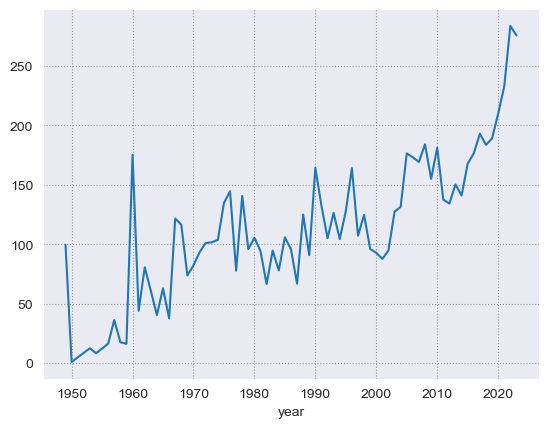

In [11]:
# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year= sets.groupby('year')['num_parts'].mean().round(2)

# Plot trends in average number of parts by year
print('Figure 3.')
lines = parts_by_year.plot.line()

In [12]:
parts_by_year.mean()

114.17109589041095

## 3.5 How the number of themes shipped has varied over the years?

Figure 4.


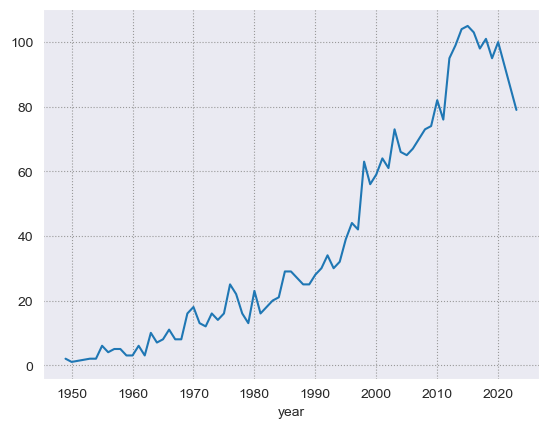

In [13]:
# Create a summary of average number of themes per year: `themes_by_year`
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')['theme_id'].nunique()
themes_by_year
print('Figure 4.')
lines = themes_by_year.plot.line()

In [14]:
themes_by_year.mean()

39.64383561643836

## 3.6 How many unique color lego bricks are available? 


In [15]:
# How many distinct colors are available?
num_colors = len(pd.unique(colors['name']))
# Print num_colors
print("No.of.unique values :", 
      num_colors)


No.of.unique values : 231


## 3.7 What is the distribution of transparent vs. non-transparent colors?

In [16]:
# colors_summary: Distribution of colors based on transparency

colors_summary = colors.groupby('is_trans').count()
colors_summary


id  name  rgb
is_trans                
f         187   187  187
t          44    44   44

##  3.8 What are the 5 most popular colors used in Lego parts?

In [17]:
# merging datasets inventory_parts and colors to get the name of the highest used color bricks
mergedf=pd.merge(inventory_parts,colors, left_on='color_id', right_on='id')
mergedf.head()   

inventory_id  part_num  color_id  quantity is_spare  \
0             1  48379c01        72         1        f   
1            22     15573        72         1        f   
2            22      2654        72         4        f   
3            22     3070b        72         1        f   
4            22     3070b        72         1        t   

                                             img_url  id              name  \
0  https://cdn.rebrickable.com/media/parts/photos...  72  Dark Bluish Gray   
1  https://cdn.rebrickable.com/media/parts/elemen...  72  Dark Bluish Gray   
2  https://cdn.rebrickable.com/media/parts/elemen...  72  Dark Bluish Gray   
3  https://cdn.rebrickable.com/media/parts/elemen...  72  Dark Bluish Gray   
4  https://cdn.rebrickable.com/media/parts/elemen...  72  Dark Bluish Gray   

      rgb is_trans  
0  6C6E68        f  
1  6C6E68        f  
2  6C6E68        f  
3  6C6E68        f  
4  6C6E68        f

In [18]:
# top 5 colors
top_5_colors=mergedf.groupby(['name'])['quantity'].sum().sort_values(ascending=False).head()
top_5_colors=pd.DataFrame(top_5_colors)
top_5_colors.rename(columns = {'quantity':'Quantity'},inplace = True)
display(top_5_colors)


Quantity
name                       
Black                723370
Light Bluish Gray    441082
White                431965
Dark Bluish Gray     313686
Red                  284305

In [19]:
# Creating visualization to displat the data using plotly
print('Figure 5.')
import plotly.express as px
pd.options.plotting.backend='plotly'
colors = ['black', 'lightsteelblue', 'white', 'darkslategray', 'red']
fig = px.bar(top_5_colors,x=top_5_colors.index,y='Quantity',color=top_5_colors.index,
            color_discrete_sequence=colors,
             height=700, width=900,
             title='Five most popular Lego colors',
             labels={'quantity':'Total quantity'}, 
             template='plotly_dark')
fig.update_xaxes(title=None)
fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(showlegend=False)

fig.show()

Figure 5.


## 3.9 What are the top 10 Lego themes?

In [20]:
#joining datasets theme and sets to get the name of theme for highest number of sets 
merge_set_theme=pd.merge(sets,themes, left_on='theme_id', right_on='id')
merge_set_theme.head()

set_num                          name_x  year  theme_id  num_parts  \
0   001-1                           Gears  1965         1         43   
1   002-1  4.5V Samsonite Gears Motor Set  1965         1          3   
2  1030-1  TECHNIC I: Simple Machines Set  1985         1        210   
3  1038-1              ERBIE the Robo-Car  1985         1        120   
4  1039-1            Manual Control Set 1  1986         1         39   

                                             img_url  id   name_y  parent_id  
0   https://cdn.rebrickable.com/media/sets/001-1.jpg   1  Technic        NaN  
1   https://cdn.rebrickable.com/media/sets/002-1.jpg   1  Technic        NaN  
2  https://cdn.rebrickable.com/media/sets/1030-1.jpg   1  Technic        NaN  
3  https://cdn.rebrickable.com/media/sets/1038-1.jpg   1  Technic        NaN  
4  https://cdn.rebrickable.com/media/sets/1039-1.jpg   1  Technic        NaN

In [21]:
# sorting to get the top 10 themes
top_10_themes=merge_set_theme.groupby(['name_y'])['set_num'].count().sort_values(ascending=False).head(10)
top_10_themes=pd.DataFrame(top_10_themes)
top_10_themes = top_10_themes.rename(columns={'set_num': 'Number_of_sets'}, index={'name_y': 'Theme'})
display(top_10_themes)

Number_of_sets
name_y                      
Star Wars                909
Technic                  857
Key Chain                689
Books                    648
Friends                  565
Gear                     516
Ninjago                  497
Basic Set                478
Bionicle                 441
Supplemental             435

In [22]:
# Creating visualization to displat the data using plotly

print('Figure 6.')
fig = px.bar(top_10_themes, 
             y=top_10_themes.index,
             x='Number_of_sets', 
             color=top_10_themes.index, 
             color_continuous_scale='Rainbow_r',  
             template='plotly_dark', 
             labels={'Number_of_sets':'Number of Sets','name_y':'Theme Name'},
             title='Top 10 Lego Themes'
            )

fig.show()

Figure 6.


## 4.0 Summary of main findings


#### 3.3 What is the number of Lego sets released per year?

The annual number of sets released was determined, giving a clear picture of the company's production over time and tracking its growth and development. The average number of sets released by the company since its establishment was calculated to be **292.8**, serving as a baseline for understanding the company's production output over time and informing future production goals.

#### 3.4 What is the average number of Lego parts per year?
An analysis of the company's production data reveals the average number of pieces in all sets to be **114.17**. Further analysis allows for calculation of average pieces produced yearly, which can inform decisions about production and improvement opportunities. 


#### 3.5 How the number of themes shipped has varied over the years?
An analysis of the company's production data reveals the average number of themes shipped over the years comes around **39.6**.  Further analysis shows the data is skewed during the intial years prior to 1993 which can further inform decisions about production and improvement opportunities.


#### 3.6 What are the 5 most popular colors used in Lego parts?

The analysis has revealed the top 5 most frequently used colors in Lego parts, with **Black** occupying the top spot with an impressive 723.37K bricks, followed by **White, Light Bluish Gray, Red, and Dark Bluish Gray**. These findings offer valuable insights into the color distribution of Lego parts and can be used to inform production and design decisions, helping to ensure that Lego continues to meet the needs and preferences of its customers. The inclusion of Figure 5 provides a clear visual representation of the data, making it easy to understand and interpret.

#### 3.7 What is the distribution of transparent vs. non-transparent colors?

The analysis has provided valuable insights into the color distribution of Lego parts by classifying them as transparent or solid color. With **187 solid color** parts out of a **total of 231 Lego bricks colors** analyzed, I've identified there are **44 transparent colors** available **which is 19% of the total colorss**. These findings underscore the importance of considering color distribution when designing and manufacturing Lego parts, as well as the value of data-driven decision making in the production process.

#### 3.8 How many unique color lego bricks are available?
The analysis shows that there are **231** unique colours available among lego colors.

#### 3.9 What are the top 10 lego themes?

   1. Starwars 
   2. Technic 
   3. Key Chain
   4. Books
   5. Friends
   6. Gear
   7. Ninjago 
   8. Basic Set
   9. Bionicle
   10. Supplemental
   

The analysis has provided valuable insights into the popularity of various Lego sets, with the ranking table clearly highlighting the top-performing themes. With **Starwars and Technic leading the way with the highest number of sets, followed by Key Chain,Books, Friends,Gear,Ninjago Basic Set,Bionicle,Supplemental** shed light on the preferences of Lego enthusiasts and offer valuable information for anyone interested in the world of Lego building. The inclusion of Figure 6 provides a visual representation of the data, allowing for a quick and easy understanding of the results obtained.



These results provide valuable insights into the company's production and inventory, enabling informed decisions to be made regarding future production goals and inventory management.
